In [1]:
import keras
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest, ytest) = mnist.load_data()

In [3]:
#formatage des datas
ytest2 = to_categorical(ytest)
ytrain2 = to_categorical(ytrain)

xtrain = np.reshape(xtrain, [-1,28,28,1] )
xtest = np.reshape(xtest, [-1,28,28,1] )

xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [4]:
model = Sequential()
model.add( Conv2D(filters = 64, kernel_size = 3 , activation = 'relu', input_shape= [28,28,1]  ) )
model.add( MaxPooling2D(2) )
model.add( Conv2D( filters = 64, kernel_size = 3, activation = 'relu' ) )
model.add( MaxPooling2D(2) )
model.add( Conv2D( filters = 64, kernel_size = 3, activation = 'relu' ) )
model.add( MaxPooling2D(2) )
model.add( Flatten() )
model.add( Dropout(0.2) )
model.add( Dense(10) )
model.add( Activation('softmax') )


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [6]:
plot_model(model,to_file='cnn-mnist.png', show_shapes=True)

In [7]:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']  )

In [9]:
model.fit(xtrain,ytrain2, epochs=20 , batch_size= 128, validation_split=0.2 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 217us/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0095 - val_acc: 0.9975
Epoch 2/20
48000/48000 [==============================] - 16s 338us/step - loss: 0.0173 - acc: 0.9939 - val_loss: 0.0162 - val_acc: 0.9945
Epoch 3/20
48000/48000 [==============================] - 10s 210us/step - loss: 0.0157 - acc: 0.9948 - val_loss: 0.0123 - val_acc: 0.9967
Epoch 4/20
48000/48000 [==============================] - 5s 112us/step - loss: 0.0158 - acc: 0.9945 - val_loss: 0.0130 - val_acc: 0.9958
Epoch 5/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0152 - acc: 0.9946 - val_loss: 0.0160 - val_acc: 0.9957
Epoch 6/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0144 - acc: 0.9950 - val_loss: 0.0163 - val_acc: 0.9951
Epoch 7/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0140 - acc: 0.9955 - val_loss: 0.0161

In [10]:
#Prediction
ytestPred =  model.predict_classes(xtest)

In [15]:
import matplotlib.pyplot as plt
def viewMinst(mtr,lbl,pred):
    """view minst"""
    plt.title('Value : {}, Predict : {}'.format(lbl, pred))
    plt.imshow(mtr.reshape(28,28), cmap='gray')
    plt.show()

In [12]:
#Get wrong prediction index 
neq = ytest == ytestPred
neq = np.where(neq==False)
neq

(array([  62,  321,  445,  449,  582,  659,  716,  726,  804,  938,  947,
        1014, 1112, 1182, 1226, 1232, 1242, 1247, 1256, 1260, 1299, 1328,
        1393, 1444, 1581, 1621, 1681, 1737, 1790, 1878, 1940, 1941, 1987,
        2018, 2023, 2035, 2044, 2070, 2118, 2129, 2130, 2135, 2189, 2329,
        2406, 2414, 2433, 2454, 2462, 2496, 2597, 2607, 2654, 2771, 2927,
        2953, 2995, 3030, 3055, 3267, 3288, 3384, 3422, 3457, 3520, 3726,
        3762, 3767, 3778, 3853, 3906, 3939, 4017, 4027, 4065, 4078, 4176,
        4201, 4248, 4289, 4360, 4477, 4487, 4497, 4507, 4536, 4571, 4723,
        4740, 4761, 4823, 4837, 4838, 4861, 4880, 4966, 5268, 5457, 5634,
        5655, 5888, 5937, 5955, 6091, 6173, 6557, 6558, 6560, 6571, 6576,
        6597, 6625, 6651, 6783, 6796, 7233, 7235, 8128, 8382, 8527, 9009,
        9024, 9599, 9620, 9634, 9642, 9664, 9692, 9710, 9729, 9770, 9792,
        9839, 9922], dtype=int64),)

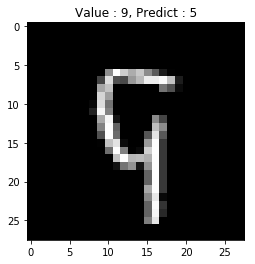

In [16]:
viewMinst(xtest[62],ytest[62],ytestPred[62])